In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import tree

In [38]:
df = pd.read_csv('trainKK.csv')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.Age = df.Age.fillna(df.Age.mean())

In [41]:
df['Sex'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [42]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,2.531876,0.147541,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408


In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
x = df[['Pclass', 'Sex', 'Age', 'Parch', 'Fare']]
x 

,Pclass,Sex,Age,Parch,Fare
0,3,0,22.000000,0,7.2500
1,1,1,38.000000,0,71.2833
2,3,1,26.000000,0,7.9250
3,1,1,35.000000,0,53.1000
4,3,0,35.000000,0,8.0500
...,...,...,...,...,...
886,2,0,27.000000,0,13.0000
887,1,1,19.000000,0,30.0000
888,3,1,29.699118,2,23.4500
889,1,0,26.000000,0,30.0000


In [45]:
y = df.Survived
y 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
## the number of survived people is 342 
## the number of unsurvived people is 549

<AxesSubplot:xlabel='Survived'>

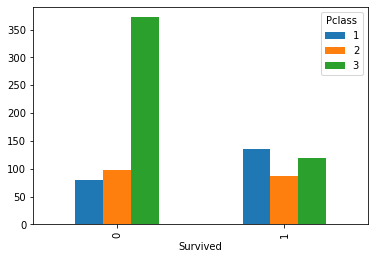

In [48]:
pd.crosstab(y, x.Pclass).plot(kind ='bar')

In [49]:
x['Pclass'][y == 0].value_counts()
# the number of unsurvived people at 1st class 80, 2nd class 97, 3rd class 379 

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [50]:
x['Pclass'][y == 1].value_counts()
# the number of unsurvived people at 1st class 136, 2nd class 87, 3rd class 119

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [51]:
x['Sex'][y == 0].value_counts()
# the number of unsurvived from men is 468 & from women 81

0    468
1     81
Name: Sex, dtype: int64

In [52]:
x['Sex'][y == 1].value_counts()
# the number of survived from men is 109 & from women 233

1    233
0    109
Name: Sex, dtype: int64

In [53]:
x.groupby('Pclass').count()

,Sex,Age,Parch,Fare
Pclass,,,,
1,216,216,216,216
2,184,184,184,184
3,491,491,491,491


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [55]:
len(x_train)

712

In [56]:
len(x_test)

179

In [57]:
model = tree.DecisionTreeClassifier()

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
model.score(x_train, y_train)

0.9873595505617978

In [60]:
model.score(x_test, y_test)

0.7932960893854749

In [61]:
model.predict([[1, 2,40,1,50 ]])
# if there was a woman in the second class and her age was 40 and she had another family member and her fare is 50
###  she would be survived

array([1], dtype=int64)